<h1 align="center">Fraud Risk Prediction Model</h1>

The data on this study are **Fraud Risk data** which are including Gender, Married, Dependents, Education,	Self_Employed,	ApplicantIncome, CoapplicantIncome, LoanAmount,	Loan_Term, Credit_History_Available, Housing Locality, Fraud_Risk etc. They are collected by Google's Kaggle.

Fraud Risk Prediction model implementation, and performance evaluation are conducted with pre-processing.

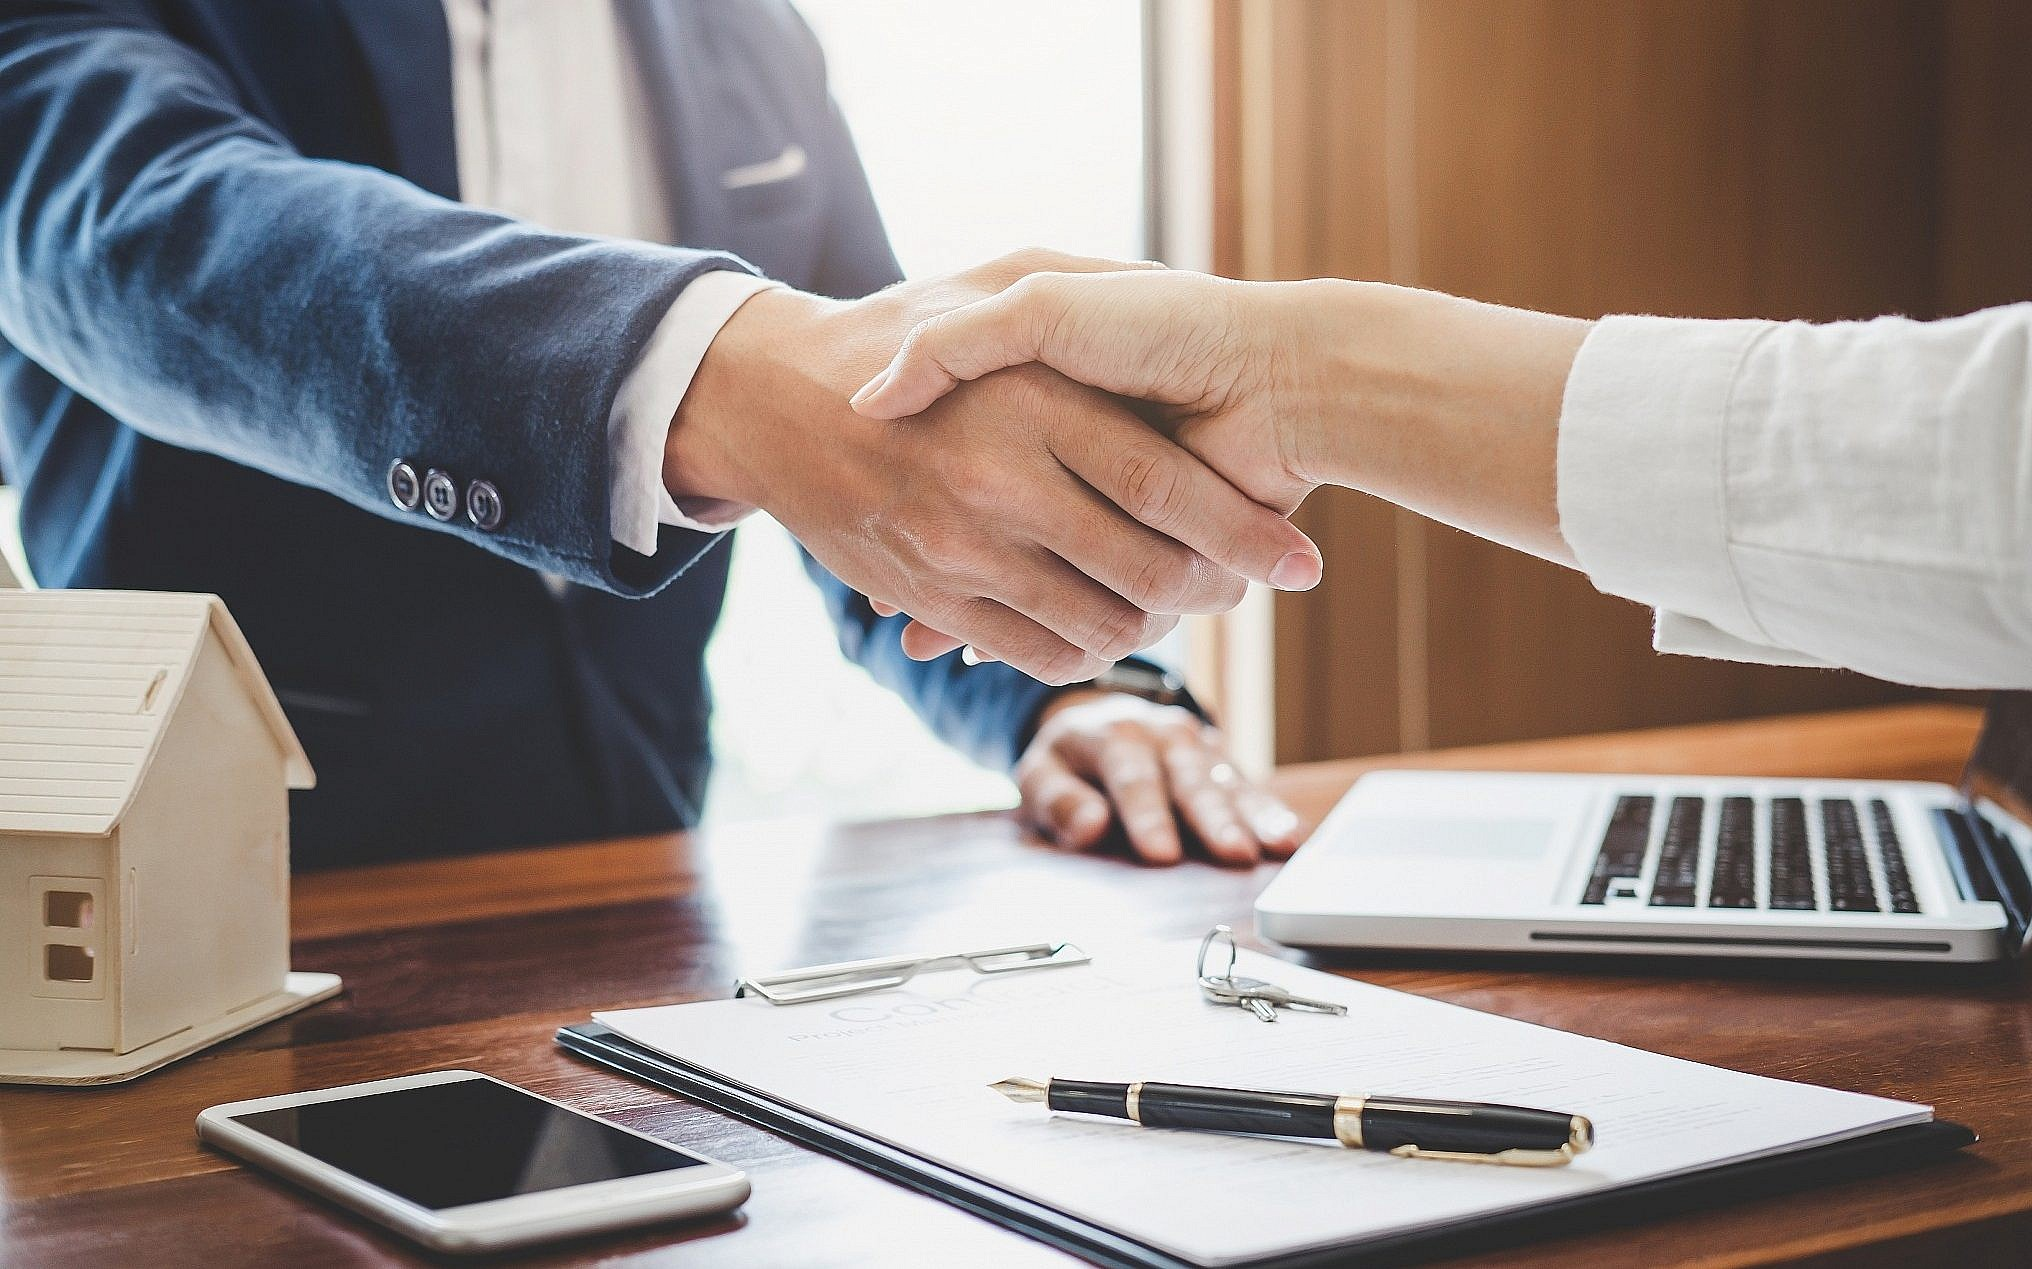

### Functions:
- Importing Libraries
- Reading and Preparing the dataset
- Exploring the data
- Cleaning the data
- Exracting the data
- Visualizing the data
- Creating a model
- Conclusion

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Read & View data

In [2]:
d=pd.read_csv('fraud.csv')
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0


# Extracting dataset

### To Find Unique values

In [3]:
d.nunique()

Gender                        2
Married                       2
Dependents                    4
Education                     2
Self_Employed                 2
ApplicantIncome             688
CoapplicantIncome           354
LoanAmount                  223
Loan_Term                    44
Credit_History_Available      2
Housing                       2
Locality                      3
Fraud_Risk                    2
dtype: int64

# Exploring the data

### Checking for shape, null value, datatype

In [4]:
d.shape

(827, 13)

In [5]:
d.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

In [6]:
d.dtypes

Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome           int64
LoanAmount                  int64
Loan_Term                   int64
Credit_History_Available    int64
Housing                     int64
Locality                    int64
Fraud_Risk                  int64
dtype: object

### Top & Bottom 5 Details

In [43]:
d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
5,1,1,2,1,1,5417,4196,267,360,1,0,1,1
6,1,1,0,0,1,2333,1516,95,360,1,1,1,1
7,1,1,3,1,1,3036,2504,158,360,0,1,2,1
8,1,1,2,1,1,4006,1526,168,360,1,1,1,1
9,1,1,1,1,1,12841,10968,349,360,1,0,2,1


In [8]:
d.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0
826,1,0,0,1,0,3847,0,78,360,1,1,2,0


## To Find Correlation & Columns

In [9]:
d.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
Gender,1.000000,0.355319,0.121868,-0.080883,0.256583,0.010382,0.116468,0.089613,-0.074194,-0.019499,-0.006226,-0.002798,0.309570
Married,0.355319,1.000000,0.375512,-0.034168,0.829158,0.071710,0.106108,0.175254,-0.108588,-0.085615,-0.093419,-0.019892,0.825064
Dependents,0.121868,0.375512,1.000000,-0.025549,0.349978,0.130331,0.026961,0.182559,-0.050031,-0.085019,-0.022433,-0.012152,0.315421
Education,-0.080883,-0.034168,-0.025549,1.000000,-0.027868,0.127969,0.050707,0.154714,0.109241,0.057124,0.001073,-0.103206,-0.037406
Self_Employed,0.256583,0.829158,0.349978,-0.027868,1.000000,0.138274,0.078241,0.229533,-0.104434,-0.049356,-0.106595,-0.049677,0.688170
ApplicantIncome,0.010382,0.071710,0.130331,0.127969,0.138274,1.000000,-0.120363,0.564923,-0.004199,-0.022038,-0.049480,-0.018499,0.066347
CoapplicantIncome,0.116468,0.106108,0.026961,0.050707,0.078241,-0.120363,1.000000,0.165940,-0.054756,-0.035843,-0.018713,0.003190,0.120304
LoanAmount,0.089613,0.175254,0.182559,0.154714,0.229533,0.564923,0.165940,1.000000,0.073583,-0.024920,-0.084477,0.022021,0.164087
Loan_Term,-0.074194,-0.108588,-0.050031,0.109241,-0.104434,-0.004199,-0.054756,0.073583,1.000000,0.076045,0.026219,0.084809,-0.097339
Credit_History_Available,-0.019499,-0.085615,-0.085019,0.057124,-0.049356,-0.022038,-0.035843,-0.024920,0.076045,1.000000,0.017112,-0.005251,-0.239512


In [10]:
d.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term',
       'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk'],
      dtype='object')

## Basic & Statistical info

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [12]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,827.0,0.733978,0.442143,0.0,0.0,1.0,1.0,1.0
Married,827.0,0.481258,0.499951,0.0,0.0,0.0,1.0,1.0
Dependents,827.0,0.652963,0.935835,0.0,0.0,0.0,1.0,3.0
Education,827.0,0.790810,0.406976,0.0,1.0,1.0,1.0,1.0
Self_Employed,827.0,0.574365,0.494738,0.0,0.0,1.0,1.0,1.0
ApplicantIncome,827.0,5212.970979,5593.713304,150.0,2894.5,3752.0,5478.0,81000.0
CoapplicantIncome,827.0,1486.050786,2802.847983,0.0,0.0,0.0,2177.0,41667.0
LoanAmount,827.0,140.892382,79.820451,9.0,100.0,125.0,156.5,700.0
Loan_Term,827.0,338.128174,75.353151,12.0,360.0,360.0,360.0,480.0
Credit_History_Available,827.0,0.885127,0.319062,0.0,1.0,1.0,1.0,1.0


# Data Exploration

In [13]:
d['Fraud_Risk'].unique()

array([0, 1], dtype=int64)

In [14]:
d['ApplicantIncome'].min()

150

In [15]:
d[['Gender','Self_Employed','ApplicantIncome','Education','Fraud_Risk']][(d['Gender']==1)&(d['Self_Employed']==1)&(d['ApplicantIncome']>15000)]

,Gender,Self_Employed,ApplicantIncome,Education,Fraud_Risk
130,1,1,20166,1,0
155,1,1,39999,1,1
183,1,1,33846,1,1
185,1,1,39147,1,1
254,1,1,16250,1,1
284,1,1,20667,1,1
333,1,1,63337,1,1
369,1,1,19730,1,1
409,1,1,81000,1,1
475,1,1,16525,1,1


In [16]:
d[['Gender','Self_Employed','ApplicantIncome','Education','Fraud_Risk']][(d['Gender']==0)&(d['Self_Employed']==1)&(d['ApplicantIncome']>17000)]

,Gender,Self_Employed,ApplicantIncome,Education,Fraud_Risk
126,0,1,23803,1,1
171,0,1,51763,1,1
493,0,1,17263,0,0
534,0,1,18165,0,0
561,0,1,19484,1,1
794,0,1,17024,0,0


In [17]:
d[['Gender','Self_Employed','ApplicantIncome','Education','Fraud_Risk']][(d['Self_Employed']==1)&(d['Education']==1)&(d['ApplicantIncome']>15000)]

,Gender,Self_Employed,ApplicantIncome,Education,Fraud_Risk
126,0,1,23803,1,1
130,1,1,20166,1,0
155,1,1,39999,1,1
171,0,1,51763,1,1
183,1,1,33846,1,1
185,1,1,39147,1,1
254,1,1,16250,1,1
284,1,1,20667,1,1
333,1,1,63337,1,1
369,1,1,19730,1,1


In [18]:
d[['Gender','Self_Employed','ApplicantIncome','Education','Fraud_Risk']][(d['Fraud_Risk']==1)]

,Gender,Self_Employed,ApplicantIncome,Education,Fraud_Risk
1,1,1,4583,1,1
2,1,1,3000,1,1
3,1,1,2583,0,1
5,1,1,5417,1,1
6,1,1,2333,0,1
...,...,...,...,...,...
608,1,1,3232,1,1
610,1,1,4106,1,1
611,1,1,8072,1,1
612,1,1,7583,1,1


In [19]:
d['Fraud_Risk'].value_counts()

1    477
0    350
Name: Fraud_Risk, dtype: int64

In [20]:
C=pd.pivot_table(data=d[['ApplicantIncome','Education','Fraud_Risk']],index=['Education','Fraud_Risk'],values="ApplicantIncome",aggfunc="max")
C.sort_values(by=["ApplicantIncome"])

ApplicantIncome
Education Fraud_Risk                 
0         1                      7667
          0                     18165
1         0                     37719
          1                     81000

# Data Visuallization 

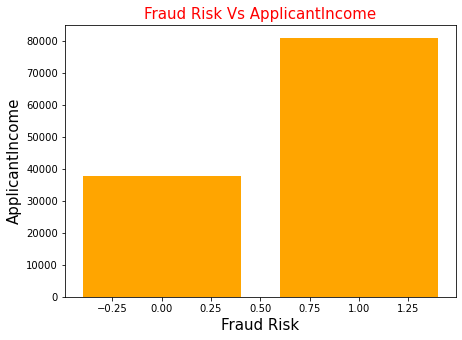

In [21]:
plt.figure(figsize=(7,5))
plt.bar(d['Fraud_Risk'],d['ApplicantIncome'],color="orange")
plt.title('Fraud Risk Vs ApplicantIncome',fontsize=15,color='red')
plt.ylabel('ApplicantIncome',fontsize=15)
plt.xlabel('Fraud Risk',fontsize=15)
plt.show()

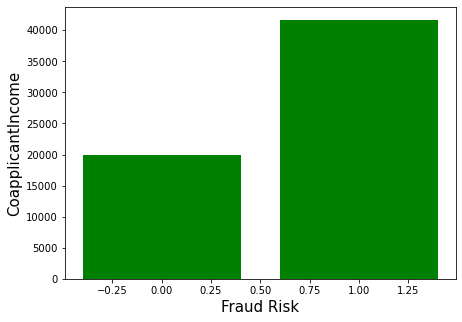

In [22]:
plt.figure(figsize=(7,5))
plt.bar('Fraud_Risk','CoapplicantIncome', data=d,color='green')
plt.ylabel('CoapplicantIncome',fontsize=15)
plt.xlabel('Fraud Risk',fontsize=15)
plt.show()

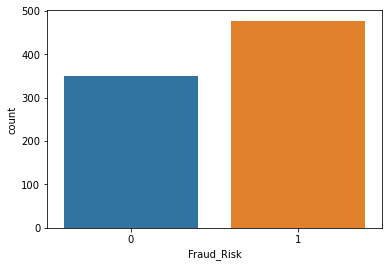

In [44]:
sns.countplot(x='Fraud_Risk',data=d,palette='coolwarm')
plt.show()

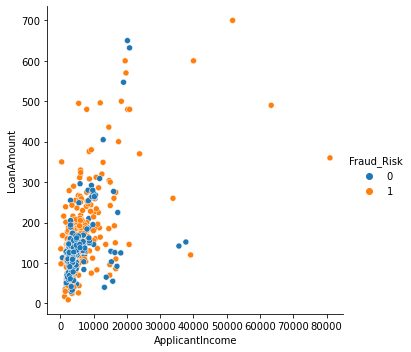

In [24]:
sns.relplot(y='LoanAmount',x='ApplicantIncome',hue='Fraud_Risk',data=d)
plt.show()

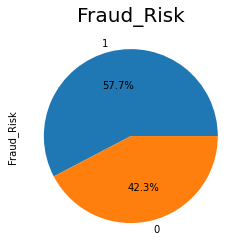

In [46]:
plt.title('Fraud_Risk',fontsize=20)
d['Fraud_Risk'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

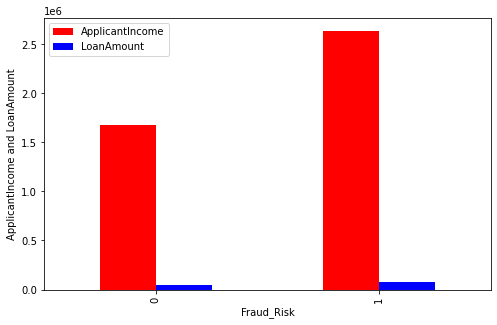

In [26]:
d.groupby('Fraud_Risk')[['ApplicantIncome','LoanAmount']].sum().plot.bar(color=['red','blue'],figsize=(8,5))
plt.ylabel('ApplicantIncome and LoanAmount')
plt.show()

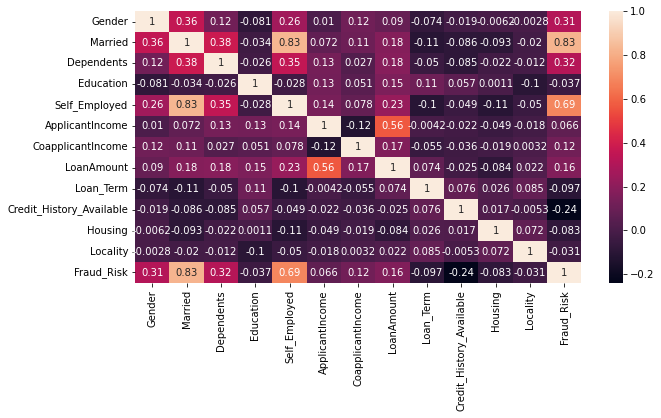

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(d.corr(),annot=True)
plt.show()

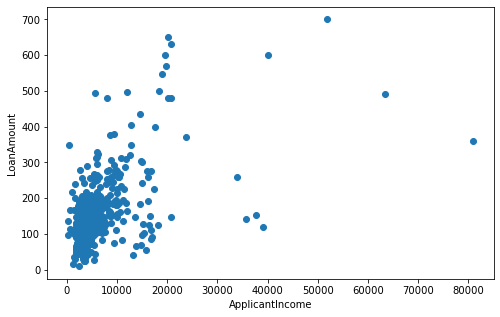

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y='LoanAmount',x='ApplicantIncome',data=d)
plt.ylabel('LoanAmount')
plt.xlabel('ApplicantIncome')
plt.show()

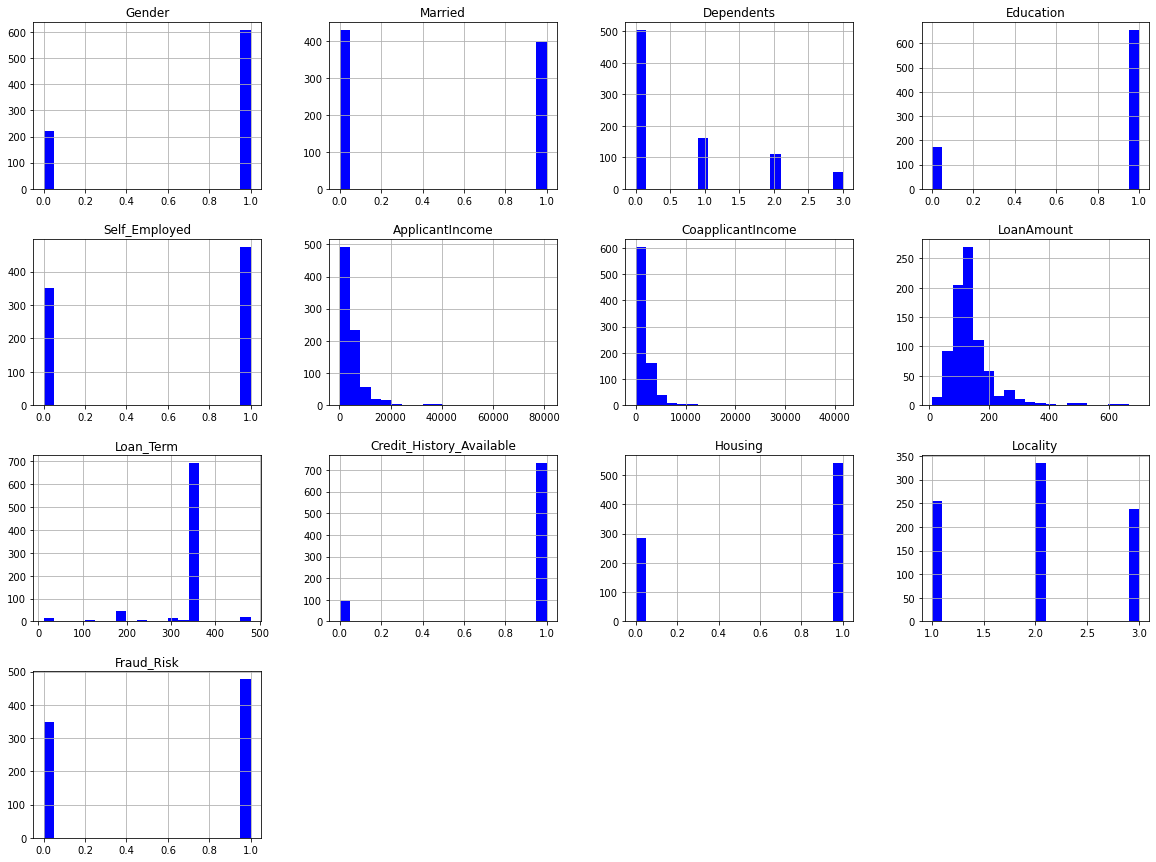

In [29]:
d.hist(bins=20 ,figsize=(20,15),color='blue')
plt.show()

# Machine Learning

In [30]:
x=d.drop(['Fraud_Risk'],axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
0,1,0,0,1,0,5849,0,146,360,1,1,1
1,1,1,1,1,1,4583,1508,128,360,1,1,3
2,1,1,0,1,1,3000,0,66,360,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1
823,0,0,1,1,1,8596,0,162,360,1,1,2
824,1,0,1,1,1,3664,0,109,215,1,1,1
825,1,0,2,1,0,4921,0,162,360,0,1,2


In [31]:
y=d.Fraud_Risk
y

0      0
1      1
2      1
3      1
4      0
      ..
822    0
823    0
824    0
825    0
826    0
Name: Fraud_Risk, Length: 827, dtype: int64

## Train test split

In [32]:
from sklearn.model_selection import train_test_split

### Splitting the dataset:
- test_size = 0.25 so that data is split into 75% and 25%
- random_state is applied so that each time we run we get the same result

# Model Creation

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [34]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(620, 12) (207, 12) (620,) (207,)


In [35]:
from sklearn.metrics import *
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import *
import time

### Training the data with Some of the ML approaches:
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- AdaBoost Classifier

### ML approach Functions
- Model fitting
- Predicting using test
- Accuracy score
- Confusion matrix
- Classification Report
- time taken by each model

In [36]:
def model_create(model, x_train, y_train, x_test, y_test):
    i_time=time.time()
    model.fit(x_train,y_train)
    model.score(x_test,y_test)
    y_predict=model.predict(x_test)
    acc_s=accuracy_score(y_test,y_predict)
    t=time.time()-i_time
    print('Time Taken: {}'.format(t))
    print('Accuracy: {}'.format(acc_s))
    print(classification_report(y_test,y_predict))
    plot_confusion_matrix(model, x_test, y_test)
    return model, acc_s,t

### Logistic Regression

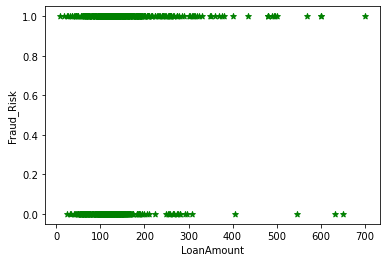

In [37]:
plt.xlabel("LoanAmount")
plt.ylabel("Fraud_Risk")
plt.scatter(d.LoanAmount,d.Fraud_Risk,marker="*",color="green")
plt.show()

Time Taken: 0.04096651077270508
Accuracy: 0.8647342995169082
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        94
           1       0.91      0.83      0.87       113

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.87       207



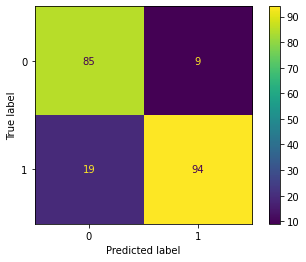

In [38]:
model_LR=LogisticRegression()
model_LR, accuracy_LR,t= model_create(model_LR, x_train, y_train, x_test, y_test)

### Random Forest Classifier

Time Taken: 0.18649077415466309
Accuracy: 0.927536231884058
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        94
           1       0.99      0.88      0.93       113

    accuracy                           0.93       207
   macro avg       0.93      0.93      0.93       207
weighted avg       0.94      0.93      0.93       207



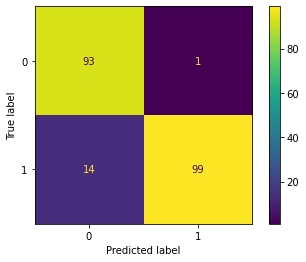

In [39]:
model_RF=RandomForestClassifier()
model_RF, accuracy_RF,t= model_create(model_RF, x_train, y_train, x_test, y_test)

### Decision Tree Classifier

Time Taken: 0.009590387344360352
Accuracy: 0.8985507246376812
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        94
           1       0.92      0.89      0.91       113

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207



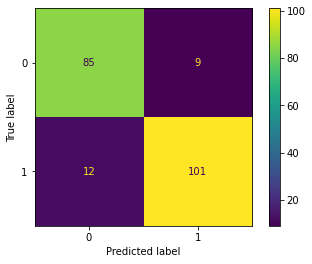

In [40]:
model_DC=DecisionTreeClassifier()
model_DC, accuracy_DC,t= model_create(model_DC, x_train, y_train, x_test, y_test)

### AdaBoostClassifier

Time Taken: 0.08109784126281738
Accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        94
           1       0.95      0.88      0.92       113

    accuracy                           0.91       207
   macro avg       0.91      0.92      0.91       207
weighted avg       0.92      0.91      0.91       207



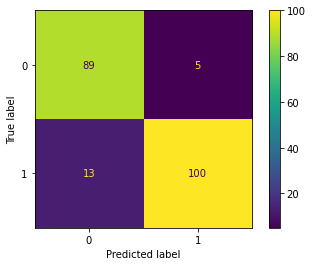

In [41]:
model_AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_AB, accuracy_AB, t= model_create(model_AB, x_train, y_train, x_test, y_test)

## BaggingClassifier

In [42]:
bg1 = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=1)
bg1cv=np.mean(cross_val_score(bg1,x_train,y_train,cv=5))
bg1cv

0.9387096774193548

# Conclusion:
- Time taken is maximum for Random Forest Classifier and minimum for LogisticRegression For a best model prediction
- Minimum time is required Comparing Random Forest is the best from among the models trained to predict the accurate result with an accuracy of 93% and time taken to execute is 16s.